# CHAPTER III

# Statistics and Data Analysis
&copy; Harishankar Manikantan, Chemical Engineering, UC Davis 

**[(3.1) Elementary Statistics](#stat)**
*  [Measures of spread](#measures) <br>
*  [Distributions and histograms](#hist) <br>

**[(3.2) Pandas: a powerful data platform](#pandas)**
*  [Introduction to data frames](#df) <br>
*  [A real example: the data science of lead in lipsticks](#lipstick) <br>


**[Practice problems](#exer)**


<a id='stat'></a>

## (3.1) Elementary Statistics

We now know how to assign, extract, organize, save, and visualize numbers. Statistics and related tools let us analyze numbers and generate meaningful insights from large amounts of data. Python has many inbuilt features that makes it one of the most popular (and powerful) tools for data analysis. We will learn about some of the basic statistical tools, and then introduce the powerful `pandas` framework.

<a id='measures'></a>



### Measures of spread

The standard measures of data are straightforward in python. For example, the minimum and maximum values of an array are directly obtained via the inbuilt `min()` and `max()` (no need for `numpy`). The arithmetic mean (or simply 'the mean') is the sum of all data points divided by the number of data points. That's an easy implementation with a loop. Alternatively, one could also use the `sum` and `len` functions to calculate the sum of all elements and the length of an array, so the mean would be:

In [1]:
# find mean of a 1D array d
find_mean=lambda d: sum(d)/len(d)

Test it with an array of your choice. What about the median? Algorithmically, this would require 'sorting' the array in ascending order, and find the middle value (if `len` is odd), or the mean of the middle values (if `len` is even). 

NumPy has an inbuilt arithmetic mean and median calculators `numpy.mean` and `numpy.median`. NumPy's functions are faster and more general than our simple function defined above. For instance, you can directly feed in a 2D (or 3D or higher dimensional) array and ask NumPy to calculate means or medians along a specific direction by providing the axis as an argument. This is extremely powerful when we want to calculate statistics of measured 2D/3D data:

In [1]:
import numpy as np

A=np.array([[1,2],[3,4]])
print(A)
print('Mean of all elements:',np.mean(A))
print('Mean along axis 0 (rows):',np.mean(A,0))
print('Mean along axis 1 (column):',np.mean(A,1))

[[1 2]
 [3 4]]
Mean of all elements: 2.5
Mean along axis 0 (rows): [2. 3.]
Mean along axis 1 (column): [1.5 3.5]


The mean (or other 'center' measures like median or mode) only tells us the most likely or most centered value. To get a sense of the 'spread', we need higher moments of statistical measures. The most common is standard deviation, which is defined as the root-mean-square sum of residuals (difference from mean) of all values in an array. Try writing a simple code for this. Numpy has a general version `std()`, with choice of averaging direction like with the mean. Same thing with the variance (or the square of teh standard deviation): use NumPy's `var()`.

To see these in action, let's play with the temperature data set from last week. To get a sense of what the data looks like, let's pick a 1D slice and plot the data first:

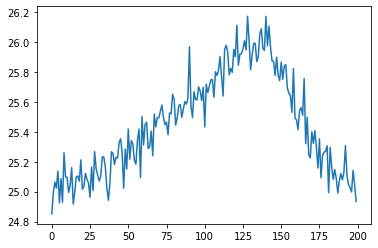

In [3]:
    temp_data=np.loadtxt("data/temperature.csv", delimiter=",")

    import matplotlib.pyplot as plt
    plt.plot(temp_data[20,:]) # pick one column
    plt.show()

You can calculate the mean of this dataset directly using `np.mean(temp_data[20,:])`. Or even better, recognize that this requires averaging along a column (corresponding to the `:` that we used to slice the array) and therefore we could use `np.mean(temp_data,1)[20]` to get the 21st element in the column-wise mean:

In [4]:
np.mean(temp_data,1)[20]

25.45062297775588

Same thing with the median. Try it. These measures give you the 'center' of the data in some sense. To see how varied the rest of the data is relative to the mean, find the standard deviation or variance:

In [5]:
np.std(temp_data,1)[20]

0.3327593142754834

Now compare this against the column slice `temp_data[:,190]`. See how the plot looks, and try to make sense of what a 'small' or 'large' standard deviation means.

When we start doing line fits and regression, these measures and their relatives will differentiate between a 'good' fit vs a bad 'fit'.

<a id='hist'></a>

### Distributions and histograms

In probability theory and statistics, a distribution is a function that provides the probabilities of occurrence of a particular data point in a measurement or experiment. An easy way to visualize distributions of data sets are **histograms** or bar graphs. NumPy's `histogram` generates two arrays, corresponding to the number of times a value repeats and the 'bin' boundaries:

In [6]:
np.histogram(temp_data[20,:])

(array([ 7, 36, 26, 23, 25, 22, 16, 21, 18,  6]),
 array([24.85101181, 24.98302908, 25.11504635, 25.24706362, 25.37908089,
        25.51109816, 25.64311543, 25.7751327 , 25.90714997, 26.03916724,
        26.17118451]))

You can control the bin number by providing it as an argument: try `np.histogram(temp_data[20,:],5)` or `np.histogram(temp_data[20,:],20)` to get frequency counts in 5 or 20 bins.

MatPlotLib's histogram function works in the same way, and takes the following form `plt.histogram(dataarray)`. This function additionally plots the data.

For example, we could draw a histogram of row 20 of `temp_data` as follows:

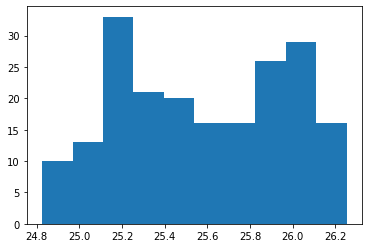

In [7]:
plt.hist(temp_data[0,:])
plt.show()

You can embellish this by providing edgecolors so each bar stands out, by providing a bin number so you control the number of bars, and you can plot multiple sets of data to compare. And the same rules for labeling and titles etc as with normal plots apply. For example:

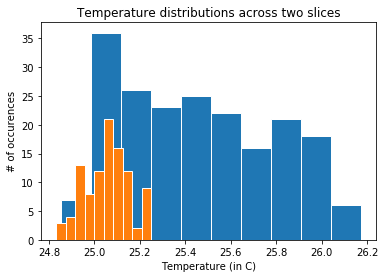

In [6]:
plt.hist(temp_data[20,:],10,edgecolor='w')
plt.hist(temp_data[:,190],10,edgecolor='w')
plt.title('Temperature distributions across two slices')
plt.xlabel('Temperature (in C)')
plt.ylabel('# of occurences')
plt.show()

This clearly shows the difference in spread between those two slices! We can further embellish by providing a transparency to either data set: like with plotting before, try using the `alpha` key. For example, `plt.hist(temp_data[:,190],10,edgecolor='w',alpha=0.5)` above should reduce the orange histograms above to 50% opacity.

Finally, histograms don't need to be overlaid and can be drawn as insets too. Like with plotting before, this is achieved by a drawing one data set on the whole figure, and another as a subplot:

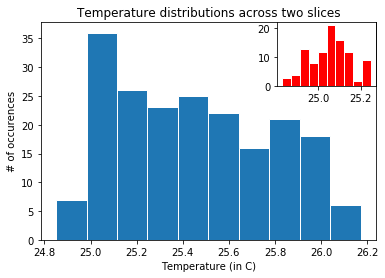

In [7]:
fig_1 = plt.figure()
ax_1 = fig_1.gca()

ax_1.hist(temp_data[20,:],10,edgecolor='w')

ax_1.set_title('Temperature distributions across two slices')
ax_1.set_xlabel('Temperature (in C)')
ax_1.set_ylabel('# of occurences')

ax_2 = fig_1.add_subplot(333)

ax_2.hist(temp_data[:,190],10,edgecolor='w',facecolor='r')

plt.show()

There are many more formatting modifications one can do with histograms (e.g. stacking, horizontal bars, grouped bars): read [MatPlotLibs's official documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) or look in the [gallery](https://matplotlib.org/3.2.1/gallery/index.html) for help and inspiration.




<a id='pandas'></a>




## (3.2) Pandas

Pandas is a handy and powerful python library for data analysis and manipulation. It's short for PANel DAta Structure (and it keeps up with the python animal pun theme!). Pandas is extremely popular in modern data science and there are countless online examples of 'big' data manipulations using pandas. Given that most industrial jobs nowadays look for some kind of data savviness, we will briefly introduce the core principles of pandas. You can teach yourself more advanced features quite easily once you know the basics, or talk to me and I can provide links to external tutorials. 

<a id='df'></a>




### Introduction to data frames



Pandas essentially creates a new type of python object with rows and columns called a 'data frame'. Data frames look very similar to tables (like in Excel or any other common word processing software), and it is much easier to work with these tables without having to loop through indices. And pandas can handle different data types (strings, integers, combinations) quite easily.

First, we import `pandas` (a common nickname is `pd`; as usual, this is optional)

In [1]:
import pandas as pd

Once that's imported, you can quickly transform any list to a data frame. For example, this list of strings becomes the data frame named `states_data` using `pd.DataFrame()`:

In [10]:
my_list = ['California', 'Nevada', 'Colorado', 'Illinois',  'New York', 'Maryland'] 
  
# convert list to dataframe
states_data= pd.DataFrame(my_list) 

Viewing the data then doesn't require the `print` statement: simply enter the name of the dataframe and execute:

In [11]:
states_data

,0
0,California
1,Nevada
2,Colorado
3,Illinois
4,New York
5,Maryland


You can see the row and column numbers, starting from 0 as expected. The power of pandas comes from beind able to give (and use) names to row and columns. To do this, we must supply a 'dictionary' instead of a list: 

In [12]:
my_dict = {'State':['California', 'Nevada', 'Colorado', 'Illinois',  'New York', 'Maryland']}

Dictionaries are lists with 'headers' (the string 'State') in this case. Notice the colon and curly braces. Converting this dictionary to a data frame and viewing it gives:

In [13]:
states_data= pd.DataFrame(my_dict) 
states_data

,State
0,California
1,Nevada
2,Colorado
3,Illinois
4,New York
5,Maryland


That looks even more like an Excel table. Let's add more information, say the capital and the area of the state. this is easy in the dicionary format: simply separate each set of data with commas.

In [14]:
my_dict = {'State':['California', 'Nevada', 'Illinois', 'Colorado', 'New York', 'Maryland'],
          'Capital':['Sacramento','Carson City','Springfield', 'Denver','Albany', 'Annapolis'],
          'Area (in sq. miles)':[163696, 110567,57915,104185,54556,12407]}

The last list (corresponding to area) is filled with integers, so we don't need quotes on each entry.

In [15]:
states_data= pd.DataFrame(my_dict) 
states_data

,State,Capital,Area (in sq. miles)
0,California,Sacramento,163696
1,Nevada,Carson City,110567
2,Illinois,Springfield,57915
3,Colorado,Denver,104185
4,New York,Albany,54556
5,Maryland,Annapolis,12407


You can see how panda data frames look better formatted than simple arrays. But the powers of panda go beyond looking nice. For example, you can view only the first 3 rows by calling `states_data[:3]`. Or do more complicated slices exactly like you would do with arrays. Try `states_data[:3]`. 

Note that 2D panda data frames only have one index, corresponding to the row number. Column indices are now replaced by the header, whihc makes accessing columns even easier. For example, you would slice just the capitals columns by saying:

In [16]:
states_data['Capital']

0     Sacramento
1    Carson City
2    Springfield
3         Denver
4         Albany
5      Annapolis
Name: Capital, dtype: object

The output is still a data frame object, which means you can logically extract data directly from this. For example, we can easily select the states with an area under 55000 square miles using:

In [17]:
states_data[states_data['Area (in sq. miles)']<55000]

,State,Capital,Area (in sq. miles)
4,New York,Albany,54556
5,Maryland,Annapolis,12407


Make sure to use the exact string of the header. 

Pandas is even better with importing csv files directly into data frames. And there are many more manipulations once can do, to plot, sort and filter directly from within pandas. We will explore some of these options with a real FDA data set below.

<a id='lipstick'></a>




### Data science of lead in lipsticks

The US Food and Drug Administration (FDA) conducted a detailed study of lead content in major lipsticks between 2009 and 2012 in an attempt to test the safety of products in the market. Details of the study and their data can be [viewed here](https://www.fda.gov/cosmetics/cosmetic-products/limiting-lead-lipstick-and-other-cosmetics#reference1). We will analyze some of the trends from the FDA data set, motivated by similar analyses by [Prof. Kristin Sainani at Stanford](https://youtu.be/nlKIT-_b2jU) and [Prof. Lorena Barba at George Washington University](https://github.com/engineersCode/EngComp). The latter link is a fantastic resource for interested readers to learn more advanced python data analysis.

For our purposes, the data set is provided in the file FDA2012-lipstickdata.csv. First, try opening the file outside python to get a sense of the how the data is laid out. You will notice that there is a header row with titles like 'Brand' and 'Parent company'. If you were using NumPy's `loadtxt` to import this data, you would have to be careful to skip this row. And, the data types are different (mixture of strings, ints, and floats) which you would force you to import columns individually (see tutorial 2, practice problems 5 and 6). Something like `np.loadtxt("FDA2012-lipstickdata.csv",delimiter=',',usecols=[3],skiprows=1)` would skip the header row and import only the third column.

Instead, pandas takes care of all this directly! And even names the columns with the appropriate headers extracted from the csv file:

In [3]:
lead2012 = pd.read_csv("data/FDA2012-lipstickdata.csv")
lead2012

,Sample #,Brand,Parent company,Lead (ppm)
0,1,Maybelline,L'Oreal USA,7.190
1,2,L'Oreal,L'Oreal USA,7.000
2,3,NARS,Shiseido,4.930
3,4,Cover Girl Queen,Procter & Gamble,4.920
4,5,NARS,Shiseido,4.890
...,...,...,...,...
395,396,M.A.C,Estee Lauder,0.030
396,397,Lori Anne,Mood Magic,0.030
397,398,Clinique,Estee Lauder,0.026
398,399,L'Oreal,L'Oreal USA,0.026


You will see that there are 400 rows of data, and pandas has organized it with appropriate row headers etc. Like before, you can slice to view any subset of the rows: for example, try `lead2012[5:300:30]` to view every 30th entry between the 5th and 300th entry. 

Let's first see how many of each brand were studied. You can count number of repeated entries using the `values_counts` operation. It's easy if we first create a variable with data from just the 'Brand' column:

In [19]:
# new variable with just Brand info
brands=lead2012['Brand']

# count repeated entries in this column
brands_count=brands.value_counts()

# display entry count
print(brands_count)

M.A.C                          41
Clinique                       34
Revlon                         33
L'Oreal                        29
Lancome                        25
Mary Kay                       25
Estee Lauder                   25
Maybelline                     23
Avon                           20
Stargazer                      18
Cover Girl                     14
Chanel                         11
Almay                           8
Victoria's Secret               7
Bobbi Brown                     7
NARS                            6
Cover Girl Queen Collection     6
Elizabeth Arden                 6
Iman Cosmetics                  6
Clarins                         5
BeneFit                         5
Rimmel London                   5
Fashion Fair                    5
Estee Lauder Prescriptives      5
Wet 'n' Wild                    4
Burt's Bees                     4
Estee Lauder Origins            4
Shiseido                        3
Dior                            3
Sonia Kashuk  

That's useful, but even better if we can visualize this. Pandas plots without explicitly using pyplot, but it's always a good idea to import pyplot so we have more control over the figure.

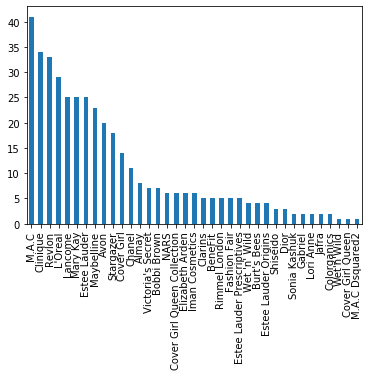

In [20]:
import matplotlib.pyplot as plt

brands_count.plot.bar()
plt.show()

Pandas automatically picks the associated string as the x-labels! You can control the figure size by providing a `figsize` option: try `brands_count.plot.bar(figsize=(10,5))`. You can have horizontal bars instead: try `brands_count.plot.barh()`. And you can provide lavels to the axes and a title. Try it.

Now let's play with the ppm measurements. Let's first look at the distribution of values that FDA recorded. Fort this, first create a new data object and then draw a histogram:

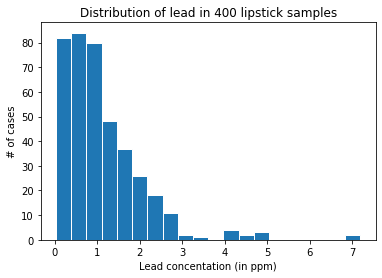

In [21]:
# new variable containing only ppm info: use correct string header
ppm=lead2012['Lead (ppm)']

plt.hist(ppm,20,edgecolor='white')

# making the plot look good
plt.title('Distribution of lead in 400 lipstick samples')
plt.xlabel('Lead concentation (in ppm)')
plt.ylabel('# of cases')
plt.show()

Looks like a spread of values under 8 ppm, with the majority under 2 ppm. Try manipulating the number of bins in the `hist` command.


Turns out all of these are within safety regulations set by FDA. However, let's say we wanted to see which ones had more than 4 ppm (this is not criticizing any brand, just pointing out what the FDA data shows!). With pandas, this is easy:

In [22]:
lead2012[ppm>4]

,Sample #,Brand,Parent company,Lead (ppm)
0,1,Maybelline,L'Oreal USA,7.19
1,2,L'Oreal,L'Oreal USA,7.00
2,3,NARS,Shiseido,4.93
3,4,Cover Girl Queen,Procter & Gamble,4.92
4,5,NARS,Shiseido,4.89
5,6,L'Oreal,L'Oreal USA,4.45
6,7,L'Oreal,L'Oreal USA,4.41
7,8,Cover Girl,Procter & Gamble,4.28
8,9,Maybelline,L'Oreal USA,4.23
9,10,Stargazer,Stargazer,4.12


You can arrange part of this information into a counted object and plot bar graphs to visualize the number of times each brand appears with ppm greater than 4:

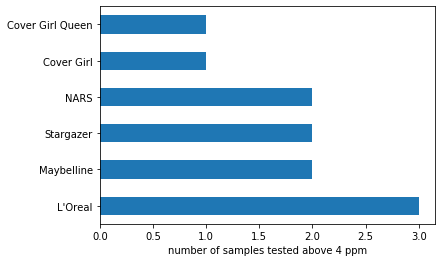

In [23]:
brands_above4=brands[ppm>4]
brands_count_above4=brands_above4.value_counts()

brands_count_above4.plot.barh()
plt.xlabel('number of samples tested above 4 ppm')
plt.show()

These examples illustrate the user-friendliness and power of pandas. For our purposes, this overview is sufficient. For curious users, there are tons of free online tutorials with advanced data science example using python and pandas. If you have specific questions beyond this level, talk to me and I can provide additional material. 


<a id='exer'></a>



### Practice Problems

(1) Go back to the COVID-19 dataset from https://github.com/nytimes/covid-19-data (tutorial 2, problem 5). Extract and plot the same data as before, but now using `pandas`.

Next, use `pandas` to create dataframes of the number of cases in all states on a certain day. Plot a horizontal bar grpah to show this. Pick another day and plot this data on top of the previous one to visualize the difference between these two days on the same figure.